## Killariben Limbachiya

# **Modern NLP Approach - Topic Extraction**

# Load The Dataset

In [3]:
# Mount Google Drive (if using Colab)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load cleaned dataset
input_path = "/content/drive/My Drive/NLP/Assignment_3/fomc_transcripts_spacy_cleaned.csv"
df = pd.read_csv(input_path)
df['Date'] = pd.to_datetime(df['Date'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df

,URL,Date,Year,Month,Day,Content,date,GDP,CPI,Unemployment,FedFundsRate,SNR_Ratio,StopWord_Ratio,Redundancy_Ratio,SpecialChar_Density,Semantic_Density,Digit_Ratio,Noise_Score,Quality_Score,cleaned_text
0,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,2025-03-01,19,HomeMonetary PolicyFederal Open Market Committ...,2025-03-31,-0.3,319.615,4.2,4.33,0.279155,0.354400,0.720845,0.022419,0.408555,0.005835,0.382654,0.305056,HomeMonetary PolicyFederal Open Market Committ...
1,https://www.federalreserve.gov/monetarypolicy/...,2025-01-29,2025,2025-01-01,29,HomeMonetary PolicyFederal Open Market Committ...,2025-01-31,-0.3,319.086,4.0,4.33,0.274118,0.350613,0.725882,0.022663,0.406096,0.006524,0.379800,0.300413,HomeMonetary PolicyFederal Open Market Committ...
2,https://www.federalreserve.gov/monetarypolicy/...,2024-12-18,2024,2024-12-01,18,HomeMonetary PolicyFederal Open Market Committ...,2024-12-31,2.4,317.603,4.1,4.48,0.276134,0.353011,0.723866,0.023393,0.410266,0.006981,0.383385,0.303015,HomeMonetary PolicyFederal Open Market Committ...
3,https://www.federalreserve.gov/monetarypolicy/...,2024-11-07,2024,2024-11-01,7,HomeMonetary PolicyFederal Open Market Committ...,2024-11-30,2.4,316.449,4.2,4.64,0.283448,0.348729,0.716552,0.023180,0.412021,0.005405,0.377315,0.318154,HomeMonetary PolicyFederal Open Market Committ...
4,https://www.federalreserve.gov/monetarypolicy/...,2024-09-18,2024,2024-09-01,18,HomeMonetary PolicyFederal Open Market Committ...,2024-09-30,3.1,314.851,4.1,5.13,0.271982,0.360516,0.728018,0.022806,0.405455,0.006638,0.389960,0.287477,HomeMonetary PolicyFederal Open Market Committ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,https://www.federalreserve.gov/monetarypolicy/...,2015-07-29,2015,2015-07-01,29,HomeMonetary PolicyFederal Open Market Committ...,2015-07-31,1.6,238.034,5.2,0.13,0.245457,0.370972,0.754543,0.019337,0.437587,0.003586,0.393894,0.289149,HomeMonetary PolicyFederal Open Market Committ...
62,https://www.federalreserve.gov/monetarypolicy/...,2015-06-17,2015,2015-06-01,17,HomeMonetary PolicyFederal Open Market Committ...,2015-06-30,2.5,237.657,5.3,0.13,0.250569,0.369906,0.749431,0.020540,0.426146,0.004592,0.395038,0.281677,HomeMonetary PolicyFederal Open Market Committ...
63,https://www.federalreserve.gov/monetarypolicy/...,2015-04-29,2015,2015-04-01,29,HomeMonetary PolicyFederal Open Market Committ...,2015-04-30,2.5,236.222,5.4,0.12,0.245321,0.366635,0.754679,0.021650,0.434374,0.004041,0.392326,0.287369,HomeMonetary PolicyFederal Open Market Committ...
64,https://www.federalreserve.gov/monetarypolicy/...,2015-03-18,2015,2015-03-01,18,HomeMonetary PolicyFederal Open Market Committ...,2015-03-31,3.6,235.976,5.4,0.11,0.246890,0.385526,0.753110,0.020051,0.423729,0.004569,0.410146,0.260472,HomeMonetary PolicyFederal Open Market Committ...


In [14]:
import pandas as pd

# 1) Convert the 'Date' column from object (string) to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 2) (Optional) Drop or inspect rows where conversion failed
# print(df[df['Date'].isna()])

# 3) Sort the DataFrame by the new datetime 'Date' column in descending order
df = df.sort_values(by='Date', ascending=False)

# 4) (Optional) Reset index if you want a clean integer index
df = df.reset_index(drop=True)

# Now df['Date'] is a datetime dtype and the rows are sorted newest → oldest
#print(df[['doc_id', 'Date']].head())

In [15]:
# 1) Make sure your index is reset 0…N‑1
df = df.reset_index(drop=True)

# 2) Rebuild doc_id as "doc1", "doc2", … up to "docN"
df['doc_id'] = 'doc' + (df.index + 1).astype(str)

# 3) Check
print(df[['doc_id', 'Date']].head())

  doc_id       Date
0   doc1 2025-03-19
1   doc2 2025-01-29
2   doc3 2024-12-18
3   doc4 2024-11-07
4   doc5 2024-09-18


In [16]:
df

,URL,Date,Year,Month,Day,Content,date,GDP,CPI,Unemployment,...,SNR_Ratio,StopWord_Ratio,Redundancy_Ratio,SpecialChar_Density,Semantic_Density,Digit_Ratio,Noise_Score,Quality_Score,cleaned_text,doc_id
0,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,2025-03-01,19,HomeMonetary PolicyFederal Open Market Committ...,2025-03-31,-0.3,319.615,4.2,...,0.279155,0.354400,0.720845,0.022419,0.408555,0.005835,0.382654,0.305056,HomeMonetary PolicyFederal Open Market Committ...,doc1
1,https://www.federalreserve.gov/monetarypolicy/...,2025-01-29,2025,2025-01-01,29,HomeMonetary PolicyFederal Open Market Committ...,2025-01-31,-0.3,319.086,4.0,...,0.274118,0.350613,0.725882,0.022663,0.406096,0.006524,0.379800,0.300413,HomeMonetary PolicyFederal Open Market Committ...,doc2
2,https://www.federalreserve.gov/monetarypolicy/...,2024-12-18,2024,2024-12-01,18,HomeMonetary PolicyFederal Open Market Committ...,2024-12-31,2.4,317.603,4.1,...,0.276134,0.353011,0.723866,0.023393,0.410266,0.006981,0.383385,0.303015,HomeMonetary PolicyFederal Open Market Committ...,doc3
3,https://www.federalreserve.gov/monetarypolicy/...,2024-11-07,2024,2024-11-01,7,HomeMonetary PolicyFederal Open Market Committ...,2024-11-30,2.4,316.449,4.2,...,0.283448,0.348729,0.716552,0.023180,0.412021,0.005405,0.377315,0.318154,HomeMonetary PolicyFederal Open Market Committ...,doc4
4,https://www.federalreserve.gov/monetarypolicy/...,2024-09-18,2024,2024-09-01,18,HomeMonetary PolicyFederal Open Market Committ...,2024-09-30,3.1,314.851,4.1,...,0.271982,0.360516,0.728018,0.022806,0.405455,0.006638,0.389960,0.287477,HomeMonetary PolicyFederal Open Market Committ...,doc5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,https://www.federalreserve.gov/monetarypolicy/...,2015-07-29,2015,2015-07-01,29,HomeMonetary PolicyFederal Open Market Committ...,2015-07-31,1.6,238.034,5.2,...,0.245457,0.370972,0.754543,0.019337,0.437587,0.003586,0.393894,0.289149,HomeMonetary PolicyFederal Open Market Committ...,doc62
62,https://www.federalreserve.gov/monetarypolicy/...,2015-06-17,2015,2015-06-01,17,HomeMonetary PolicyFederal Open Market Committ...,2015-06-30,2.5,237.657,5.3,...,0.250569,0.369906,0.749431,0.020540,0.426146,0.004592,0.395038,0.281677,HomeMonetary PolicyFederal Open Market Committ...,doc63
63,https://www.federalreserve.gov/monetarypolicy/...,2015-04-29,2015,2015-04-01,29,HomeMonetary PolicyFederal Open Market Committ...,2015-04-30,2.5,236.222,5.4,...,0.245321,0.366635,0.754679,0.021650,0.434374,0.004041,0.392326,0.287369,HomeMonetary PolicyFederal Open Market Committ...,doc64
64,https://www.federalreserve.gov/monetarypolicy/...,2015-03-18,2015,2015-03-01,18,HomeMonetary PolicyFederal Open Market Committ...,2015-03-31,3.6,235.976,5.4,...,0.246890,0.385526,0.753110,0.020051,0.423729,0.004569,0.410146,0.260472,HomeMonetary PolicyFederal Open Market Committ...,doc65


In [17]:
!pip install --upgrade transformers

In [21]:
# 🚨 Force reinstall PyTorch & NumPy without cache to fix compatibility
!pip install --force-reinstall --no-cache-dir torch==2.1.0 torchvision==0.16.0 numpy==1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 138.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 191.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 209.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 232.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 247.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 247.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 172.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 145.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 144.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 164.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [19]:
!pip install --upgrade spacy

In [9]:
import spacy


In [10]:
nlp = spacy.load("en_core_web_sm")

In [1]:
import torch
from transformers import AutoTokenizer, AutoModel
import spacy

# Load spaCy for sentence segmentation
nlp = spacy.load("en_core_web_sm")

# Load FinBERT‑tone tokenizer & model
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model     = AutoModel.from_pretrained("yiyanghkust/finbert-tone")
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30873, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [4]:
# ──────────────────────────────────────────────────────────────────────────────
# 1. IMPORTS, NLP & CHUNKING STRATEGY (450‑TOKEN, SENTENCE‑PRESERVED)
# ──────────────────────────────────────────────────────────────────────────────


def chunk_document(text: str,
                   max_tokens: int = 450,
                   overlap: int = 0
                  ) -> list[str]:
    """
    Split `text` into chunks of ≤ max_tokens (by tokenizer count),
    preserving whole sentences. Overlap = number of tokens to
    re‑use between consecutive chunks.
    """
    sentences = [sent.text.strip() for sent in nlp(text).sents]
    chunks, current, current_len = [], [], 0

    for sent in sentences:
        sent_len = len(tokenizer.tokenize(sent))
        if current_len + sent_len > max_tokens:
            chunks.append(" ".join(current))
            if overlap > 0 and current:
                # keep last `overlap` tokens as starting point
                ov_tokens = tokenizer.tokenize(" ".join(current))[-overlap:]
                ov_text = tokenizer.convert_tokens_to_string(ov_tokens)
                current = [ov_text]
                current_len = len(ov_tokens)
            else:
                current, current_len = [], 0
        current.append(sent)
        current_len += sent_len

    if current:
        chunks.append(" ".join(current))
    return chunks

def embed_texts(texts: list[str], max_length: int = 450) -> torch.Tensor:
    """
    Embed each text chunk by mean‑pooling token embeddings.
    `max_length` ensures we pad/truncate to the chunk size.
    Returns a (n_chunks × hidden_size) tensor.
    """
    embeddings = []
    with torch.no_grad():
        for txt in texts:
            inputs = tokenizer(
                txt,
                padding="max_length",
                truncation=True,
                max_length=max_length,
                return_tensors="pt"
            ).to(device)
            outputs = model(**inputs).last_hidden_state  # [1, L, H]
            mask = inputs["attention_mask"].unsqueeze(-1)  # [1, L, 1]
            summed = (outputs * mask).sum(dim=1)
            counts = mask.sum(dim=1)
            embeddings.append((summed / counts).squeeze(0))
    return torch.stack(embeddings)

# === USAGE ===
# 1. Break each document into 450‑token chunks
docs = df["cleaned_text"].tolist()
docs_chunks = [chunk_document(doc, max_tokens=450, overlap=0) for doc in docs]

# 2. Flatten for embedding
all_chunks = [chunk for sublist in docs_chunks for chunk in sublist]

# 3. Compute embeddings on 450‑token chunks
chunk_embeddings = embed_texts(all_chunks, max_length=450)



In [5]:
# ──────────────────────────────────────────────────────────────────────────────
# 2. DIMENSIONALITY REDUCTION WITH UMAP (CHUNK EMBEDDINGS)
# ──────────────────────────────────────────────────────────────────────────────
import umap
import numpy as np

# Convert the PyTorch tensor to NumPy for UMAP
chunk_embeddings_np = chunk_embeddings.cpu().numpy()

# Configure UMAP to reduce our 450‑token chunk embeddings to 5 dimensions
umap_reducer = umap.UMAP(
    n_neighbors=15,        # how many nearby chunks to consider
    n_components=5,        # target dimensionality
    metric="cosine",       # cosine distance on embedding space
    random_state=42
)

# Fit UMAP on chunk-level embeddings
umap_embeddings = umap_reducer.fit_transform(chunk_embeddings_np)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [6]:
# ──────────────────────────────────────────────────────────────────────────────
# 3. CLUSTERING WITH HDBSCAN (ON UMAP‑REDUCED CHUNKS)
# ──────────────────────────────────────────────────────────────────────────────
import hdbscan

# HDBSCAN will discover dense topic clusters in the reduced UMAP space
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=15,           # minimum chunks per cluster
    metric="euclidean",            # distance in UMAP space
    cluster_selection_method="eom" # cluster selection algorithm
)

# Fit & predict cluster labels for each chunk
cluster_labels = clusterer.fit_predict(umap_embeddings)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [7]:
# ──────────────────────────────────────────────────────────────────────────────
# 4. TOPIC REPRESENTATION USING MANUAL c‑TF‑IDF + MMR (NO BERTopic DEPENDENCY)
# ──────────────────────────────────────────────────────────────────────────────
import numpy as np
from scipy.sparse import csr_matrix
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import CountVectorizer

# STEP 1: Build Chunk-Term Matrix
vectorizer = CountVectorizer(stop_words="english")
dtm_chunks = vectorizer.fit_transform(all_chunks)  # (n_chunks × n_terms)
terms = vectorizer.get_feature_names_out().tolist()

# STEP 2: Manual c-TF-IDF Calculation
def compute_c_tf_idf(dtm: csr_matrix, labels: list[int]):
    """
    Compute class-based TF-IDF (c-TF-IDF) from a document-term matrix.
    """
    cluster_ids = sorted(set(labels))
    n_clusters = len(cluster_ids)

    tf = []
    for cid in cluster_ids:
        idx = [i for i, lbl in enumerate(labels) if lbl == cid]
        tf_c = np.array(dtm[idx, :].sum(axis=0)).reshape(-1)  # (n_terms,)
        tf.append(tf_c)
    tf = np.stack(tf)  # (n_clusters × n_terms)

    df = np.sum(tf > 0, axis=0)
    idf = np.log((n_clusters + 1) / (df + 1)) + 1

    return tf * idf, cluster_ids

ctfidf_matrix, cluster_list = compute_c_tf_idf(dtm_chunks, cluster_labels)

# STEP 3: Embed Terms (use existing FinBERT embed_texts from Block 1)
term_embeddings = embed_texts(terms, max_length=32).cpu().numpy()

# STEP 4: MMR Implementation
def mmr(candidates: list[str],
        scores: np.ndarray,
        embeddings: np.ndarray,
        top_n: int = 10,
        diversity: float = 0.7):
    """
    Select top_n terms balancing relevance and diversity using MMR.
    """
    selected, unselected = [], list(range(len(candidates)))

    min_s, max_s = scores.min(), scores.max()
    norm_scores = (scores - min_s) / (max_s - min_s + 1e-9)

    while len(selected) < min(top_n, len(unselected)):
        best_score, best_idx = None, None
        for idx in unselected:
            rel = norm_scores[idx]
            if selected:
                sim = max(1 - cosine(embeddings[idx], embeddings[s]) for s in selected)
            else:
                sim = 0
            mmr_score = diversity * rel - (1 - diversity) * sim
            if best_score is None or mmr_score > best_score:
                best_score, best_idx = mmr_score, idx
        selected.append(best_idx)
        unselected.remove(best_idx)
    return [candidates[i] for i in selected]

# STEP 5: Generate Topic Labels
topic_labels = {}
for i, cid in enumerate(cluster_list):
    if cid == -1:
        topic_labels[cid] = "Outliers"
        continue
    term_scores = ctfidf_matrix[i]
    top_terms = mmr(terms, term_scores, term_embeddings, top_n=10, diversity=0.7)
    topic_labels[cid] = " ".join(top_terms)


In [8]:
# ──────────────────────────────────────────────────────────────────────────────
# 5. ASSIGN TOPICS TO CHUNKS & AGGREGATE BACK TO DOCUMENTS
# ──────────────────────────────────────────────────────────────────────────────
import pandas as pd

# Build a DataFrame of chunks with their cluster labels
chunks_df = pd.DataFrame({
    "doc_idx":       [i for i, sub in enumerate(docs_chunks) for _ in sub],
    "chunk_text":    all_chunks,
    "cluster_id":    cluster_labels
})
# Map cluster ID → human‑readable topic name
chunks_df["topic_label"] = chunks_df["cluster_id"].map(topic_labels)

# Aggregate chunk‑level topics to each original document by majority vote
doc_topics = (
    chunks_df
    .groupby("doc_idx")["topic_label"]
    .agg(lambda lbls: lbls.value_counts().idxmax())
    .to_dict()
)
# Assign final topic per document in the original df
df["topics"] = df.index.to_series().map(doc_topics)


In [9]:
# ──────────────────────────────────────────────────────────────────────────────
# 6. PLOT TOPIC EVOLUTION OVER TIME WITH PLOTLY (USING 'Date' COLUMN)
# ──────────────────────────────────────────────────────────────────────────────
import plotly.express as px

# STEP 1: Parse the 'Date' column into datetime if not already
df["Date"] = pd.to_datetime(df["Date"])

# STEP 2: Group by Month × Topic
df_counts = (
    df.groupby([pd.Grouper(key="Date", freq="M"), "topics"])
      .size()
      .reset_index(name="count")
)

# STEP 3: Plot topic evolution using Plotly
fig = px.line(
    df_counts,
    x="Date",
    y="count",
    color="topics",
    markers=True,
    title="Topic Evolution Over Time (FOMC Statements)"
)

fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Document Count",
    legend_title="Topics",
    xaxis=dict(dtick="M1", tickformat="%b\n%Y")  # Optional: month formatting
)

fig.show()


<ipython-input-9-862b2ab32b5f>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key="Date", freq="M"), "topics"])


Cluster distribution:
Cluster 1: 1301 chunks
Cluster 4: 104 chunks
Cluster 3: 94 chunks
Cluster 2: 70 chunks
Cluster 0: 42 chunks


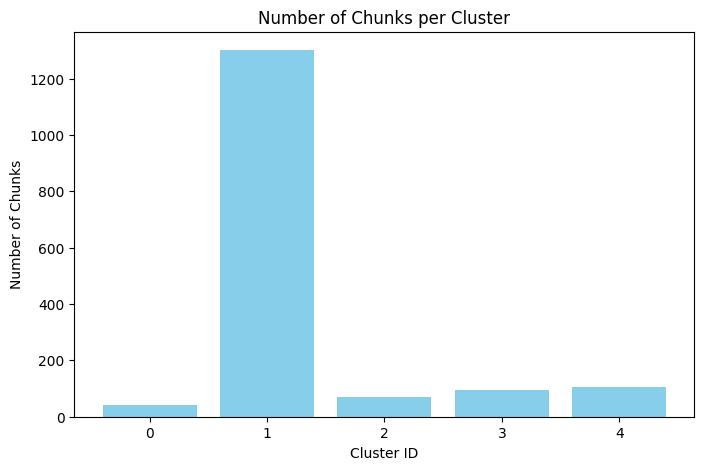

In [10]:
# ──────────────────────────────────────────────────────────────────────────────
# 6A. INSPECT CLUSTER DISTRIBUTION FROM HDBSCAN
# ──────────────────────────────────────────────────────────────────────────────
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Count how many chunks belong to each cluster label
cluster_summary = Counter(cluster_labels)

# Print label distribution
print("Cluster distribution:")
for label, count in cluster_summary.items():
    print(f"Cluster {label}: {count} chunks")

# Optional bar chart visualization
plt.figure(figsize=(8, 5))
plt.bar(cluster_summary.keys(), cluster_summary.values(), color="skyblue")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Chunks")
plt.title("Number of Chunks per Cluster")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



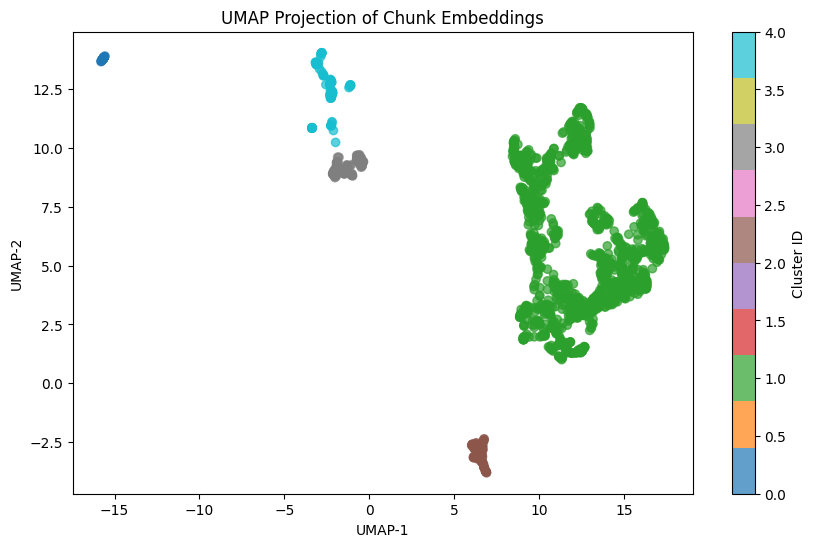

In [11]:
# ──────────────────────────────────────────────────────────────────────────────
# 6B. UMAP VISUALIZATION OF EMBEDDINGS (2D SCATTERPLOT)
# ──────────────────────────────────────────────────────────────────────────────
import umap

# Project chunk embeddings to 2D for visualization
umap_2d = umap.UMAP(n_components=2, metric="cosine", random_state=42)
points_2d = umap_2d.fit_transform(chunk_embeddings.cpu().numpy())

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(points_2d[:, 0], points_2d[:, 1], c=cluster_labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Cluster ID")
plt.title("UMAP Projection of Chunk Embeddings")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()


In [12]:
# ──────────────────────────────────────────────────────────────────────────────
# 7. STACKED AREA CHART: TOPIC TRENDS OVER TIME
# ──────────────────────────────────────────────────────────────────────────────
import plotly.express as px

# Make sure date column is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Group by month and topic
df_counts = (
    df.groupby([pd.Grouper(key="Date", freq="M"), "topics"])
      .size()
      .reset_index(name="count")
)

# Normalize counts by month to get proportions
total_per_month = df_counts.groupby("Date")["count"].transform("sum")
df_counts["percentage"] = df_counts["count"] / total_per_month

# Stacked area plot to show relative topic dominance over time
fig = px.area(
    df_counts,
    x="Date",
    y="percentage",
    color="topics",
    title="Topic Trends Over Time (Proportional Share)",
    labels={"percentage": "Share of Topic"},
)

fig.update_layout(
    yaxis=dict(tickformat=".0%"),
    xaxis_title="Month",
    yaxis_title="Topic Share",
    legend_title="Topics"
)

fig.show()


<ipython-input-12-86d82f90fec8>:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [13]:
# ──────────────────────────────────────────────────────────────────────────────
# 8. SHOW TOP 10 TERMS PER TOPIC (FROM MMR OUTPUT) — DISPLAY + OPTIONAL EXPORT
# ──────────────────────────────────────────────────────────────────────────────
import pandas as pd

# Convert MMR results into a DataFrame
topic_words_df = pd.DataFrame([
    {"topic": topic, "top_words": words}
    for topic, words in topic_labels.items()
    if topic != "Outliers"
])

# Sort by topic ID (if numeric)
topic_words_df = topic_words_df.sort_values(by="topic").reset_index(drop=True)

# Print table
print("Top 10 Terms per Topic:")
print(topic_words_df.to_string(index=False))

# Optional: Save to CSV
# topic_words_df.to_csv("topic_keywords.csv", index=False)



Top 10 Terms per Topic:
 topic                                                                                                    top_words
     0 market open committeepdfplease committeefederal javascript disabled homemonetary links browser policyfederal
     1                           inflation participants rate economic market percent labor policy committee federal
     2                           foreign committee bank transactions currency selected securities shall market swap
     3                                committee return federal attended board reserve rate meeting percent notation
     4                               division board federal affairs director reserve senior bank associate monetary


In [14]:
# ──────────────────────────────────────────────────────────────────────────────
# 9. PLOTLY SUBPLOTS (RESIZED): TOP 10 TERMS FOR EACH TOPIC
# ──────────────────────────────────────────────────────────────────────────────
import plotly.graph_objects as go
from plotly.subplots import make_subplots

top_n = 10
topics_to_plot = [cid for cid in cluster_list if cid != -1]
topics_to_plot = sorted(set(topics_to_plot))
num_topics = len(topics_to_plot)

# Layout parameters
cols = 2
rows = (num_topics + cols - 1) // cols
subplot_height = 400  # increased height per row
subplot_width = 1100  # increased width for better label spacing

fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[f"Topic {cid}" for cid in topics_to_plot],
    vertical_spacing=0.12
)

# Plot each topic
for i, topic_id in enumerate(topics_to_plot):
    row = (i // cols) + 1
    col = (i % cols) + 1

    term_scores = ctfidf_matrix[cluster_list.index(topic_id)]
    top_indices = term_scores.argsort()[::-1][:top_n]
    words = [terms[i] for i in top_indices]
    scores = [term_scores[i] for i in top_indices]

    fig.add_trace(
        go.Bar(
            x=scores[::-1],
            y=words[::-1],
            orientation="h",
            name=f"Topic {topic_id}",
            showlegend=False,
            marker_color='steelblue'
        ),
        row=row, col=col
    )

# Final layout adjustments
fig.update_layout(
    height=rows * subplot_height,
    width=subplot_width,
    title_text="Top 10 Words per Topic (by c-TF-IDF Score)",
    margin=dict(t=80, l=60, r=20, b=40),
    font=dict(size=12)
)

fig.update_yaxes(tickfont=dict(size=12))
fig.update_xaxes(title_text="c-TF-IDF Score", tickfont=dict(size=11))

fig.show()


In [15]:
df.sample(2)

,URL,Date,Year,Month,Day,Content,date,GDP,CPI,Unemployment,...,SNR_Ratio,StopWord_Ratio,Redundancy_Ratio,SpecialChar_Density,Semantic_Density,Digit_Ratio,Noise_Score,Quality_Score,cleaned_text,topics
1,https://www.federalreserve.gov/monetarypolicy/...,2025-01-29,2025,2025-01-01,29,HomeMonetary PolicyFederal Open Market Committ...,2025-01-31,-0.3,319.086,4.0,...,0.274118,0.350613,0.725882,0.022663,0.406096,0.006524,0.379800,0.300413,HomeMonetary PolicyFederal Open Market Committ...,inflation participants rate economic market pe...
46,https://www.federalreserve.gov/monetarypolicy/...,2017-06-14,2017,2017-06-01,14,HomeMonetary PolicyFederal Open Market Committ...,2017-06-30,2.3,244.163,4.3,...,0.236939,0.373093,0.763061,0.021438,0.412804,0.006895,0.401426,0.248317,HomeMonetary PolicyFederal Open Market Committ...,inflation participants rate economic market pe...


In [17]:
# Assuming df is your DataFrame
df.to_csv('/content/drive/My Drive/NLP/Assignment_3/fomc_topic.csv', index=False)

#Multi-topic assignment per Topic

In [18]:
# ──────────────────────────────────────────────────────────────────────────────
# MULTI-TOPIC ASSIGNMENT PER DOCUMENT (TOP 3 BY CHUNK FREQUENCY)
# ──────────────────────────────────────────────────────────────────────────────
import pandas as pd

# Step 1: Rebuild the chunks DataFrame if needed
chunks_df = pd.DataFrame({
    "doc_idx": [i for i, sub in enumerate(docs_chunks) for _ in sub],
    "chunk_text": all_chunks,
    "cluster_id": cluster_labels
})
chunks_df["topic_label"] = chunks_df["cluster_id"].map(topic_labels)

# Step 2: Group chunks by document and assign top N topics by frequency
top_n = 3
multi_topic_map = (
    chunks_df.groupby("doc_idx")["topic_label"]
    .agg(lambda x: x.value_counts().index[:top_n].tolist())
    .to_dict()
)

# Step 3: Add multi-topic list to original DataFrame
df["multi_topics"] = df.index.to_series().map(lambda i: multi_topic_map.get(i, []))

# Step 4: Explode to one topic per row (for plotting)
df_exploded = df.explode("multi_topics").rename(columns={"multi_topics": "topics"})

# Step 5 (Optional): View how many docs have multiple topics
df["num_topics_assigned"] = df["multi_topics"].apply(len)
print(df["num_topics_assigned"].value_counts())


num_topics_assigned
3    66
Name: count, dtype: int64


In [19]:
df.sample(2)

,URL,Date,Year,Month,Day,Content,date,GDP,CPI,Unemployment,...,Redundancy_Ratio,SpecialChar_Density,Semantic_Density,Digit_Ratio,Noise_Score,Quality_Score,cleaned_text,topics,multi_topics,num_topics_assigned
0,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,2025-03-01,19,HomeMonetary PolicyFederal Open Market Committ...,2025-03-31,-0.3,319.615,4.2,...,0.720845,0.022419,0.408555,0.005835,0.382654,0.305056,HomeMonetary PolicyFederal Open Market Committ...,inflation participants rate economic market pe...,[inflation participants rate economic market p...,3
32,https://www.federalreserve.gov/monetarypolicy/...,2019-03-20,2019,2019-03-01,20,HomeMonetary PolicyFederal Open Market Committ...,2019-03-31,2.5,254.277,3.8,...,0.771480,0.019960,0.436512,0.005434,0.393970,0.271062,HomeMonetary PolicyFederal Open Market Committ...,inflation participants rate economic market pe...,[inflation participants rate economic market p...,3
